In [3]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram

import umap

import pandas as pd


/Users/berk/dev/ml-hw2/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
dataset = pickle.load(open("../datasets/part3_dataset.data", "rb"))
df = pd.DataFrame(dataset)
df.head()
df.shape


(2004, 3072)

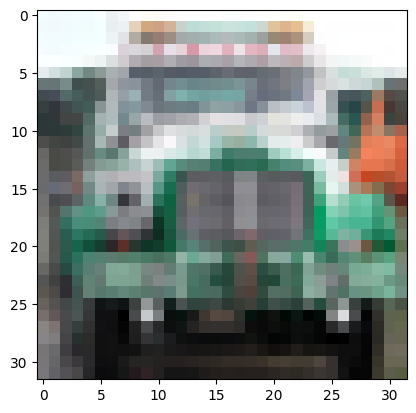

In [36]:
# data is 32x32x3 show image 
def show_image(data, i):
    data = data.reshape(32, 32, 3)
    plt.imshow(data)
    # save image
    # plt.savefig(f"imgs/{i}.png")
    # show image
    plt.show()

for i in range(480, 481):
    show_image(dataset[i], i)
    # plt.savefig(f"imgs/{i}.png")
    # show image
    # plt.show()

Best k: 2, silhouette score: 0.18108394742012024


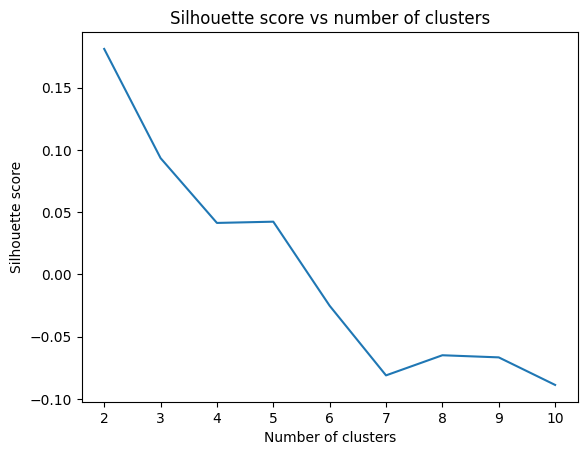

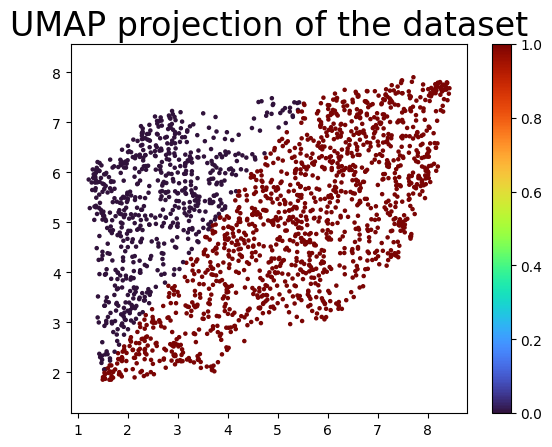

In [35]:
# kmeans clustering
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score


# print(np.unique(kmeans.labels_))

# plot scatter 
reducer = umap.UMAP()
embedding = reducer.fit_transform(dataset)

best_k = -1 
best_score = -1
k_vals = [2, 3, 4, 5, 6, 7, 8, 9, 10]

silhouette_scores = []
for k in k_vals:
    kmeans = KMedoids(n_clusters=k, metric='cosine').fit(dataset)
    silhouette_scores.append(silhouette_score(embedding, kmeans.labels_))
    if silhouette_scores[-1] > best_score:
        best_score = silhouette_scores[-1]
        best_k = k

print(f"Best k: {best_k}, silhouette score: {best_score}")

km = KMedoids(n_clusters=best_k, metric='cosine').fit(embedding)

plt.plot(k_vals, silhouette_scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.title("Silhouette score vs number of clusters")
plt.show()

plt.scatter(embedding[:, 0], embedding[:, 1], c=km.labels_, cmap='turbo', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar()
plt.title('UMAP projection of the dataset', fontsize=24)
plt.show()


